# Introductory applied machine learning (INFR10069)

# Assignment 3: Object recognition

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

Fill out this notebook, save it, and submit it **and a `.txt` file** (see Part 2) in answer to this assignment.
**You need to submit these two files electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw2 07_Assignment_3.ipynb assignment_3_predictions.txt`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename1=07_Assignment_3.ipynb
local_scp_filepath1=~/git/iaml2017/${filename1}
filename2=assignment_3_predictions.txt
local_scp_filepath2=~/git/iaml2017/${filename2}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath1} ${UUN}@${server_address}:${filename1}
scp -r ${local_scp_filepath2} ${UUN}@${server_address}:${filename2}
# rsync -rl ${local_scp_filepath1} ${UUN}@${server_address}:${filename1}
# rsync -rl ${local_scp_filepath2} ${UUN}@${server_address}:${filename2}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw2 07_Assignment_3.ipynb assignment_3_predictions.txt
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Include all required imports and execute the cell below. It's typical to include package imports at the top of the file for clarity.

In [1]:
from __future__ import print_function, division
%matplotlib inline

# Your code goes here
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
KNeighboursClassifier = KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss

## Description of the dataset
In this assignment our goal is to recognize objects in images of realistic scenes. There are 19 different classes of object e.g. person, dog, cat, car, etc. The dataset derives from several thousands photographs harvested from the web. Each object of a relevant class has been manually annotated with a bounding box. Images can contain none, one or multiple objects of each class. We have prepared a [website](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) where you can view the images.

We are going to detect whether images contain a person or not - a binary classification problem. To save you time and to make the problem manageable with limited computational resources, we have preprocessed the dataset. We will use the [Bag of Visual Words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision) representation. Each column of the dataset (which is not an lable), refers to a 'visual word'. Each image is represented by a 500 dimensional vector that contains the normalized count for each of 500 different visual words present in the respective image (a similar representation is used for the spambase dataset, just for real words). See the Appendix at the bottom of the notebook for more information. The image data is thus a $N \times 500$ dimensional matrix where `N` is the number of images.

The full dataset has 520 attributes (dimensions). The first attribute (`imgID`) contains the image ID which allows you to associate a data point with an actual image. The next 500 attributes (`dim1`, ..., `dim500`) are a normalized count vector for each visual word. The last 19 attributes (`is_class`) are the labels - 1 means the class is present in the image. In most of the experiments (unless explicitly noted otherwise) you will only need the `is_person` attribute and the 500 dimensional feature vector. **Do not use the additional class indicator attributes as features** unless explicitly told to do so. 

In Part A we provide you with a training (`train_images partA.csv`) and a validation (`valid_images partA .csv`) dataset. In Part B we provide three data sets: a training set (`train_images partB.csv`), a validation set (`valid_images partB.csv`), and a test set (`test_images partB.csv`). The training and validation set contain valid labels. In the test set the labels are missing. The files are available from the GitHub repository. 

**Important**: *Throughout the assignment you will be given various versions of the dataset that are relevant
to a particular question. Please be careful to use the correct version of the dataset when instructed to do so.
If you use the wrong version of the dataset by mistake no marks will be awarded.*

## 1. Exploration of the dataset [70%]

### ========== Question 1.1 --- [1 mark] ==========
Create two Pandas DataFrame objects called `train_A` and `valid_A` by loading the datasets `train_images_partA.csv` and `valid_images_partA.csv`. Display the number of data points and attributes in each of the two datasets.

In [2]:
dataPathTrain = os.path.join(os.getcwd(),'datasets','train_images_partA.csv')
dataPathValid = os.path.join(os.getcwd(),'datasets','valid_images_partA.csv')
train_A = pd.read_csv(dataPathTrain)
valid_A = pd.read_csv(dataPathValid)
print('train_A Attributes: {}\tNumber of data points:{}'.format(train_A.shape[1],train_A.shape[0]))
print('valid_A Attributes: {}\tNumber of data points:{}'.format(valid_A.shape[1],valid_A.shape[0]))
print('Out of the 520, the first is id and the last 19 are class labels')

train_A Attributes: 520	Number of data points:2093
valid_A Attributes: 520	Number of data points:1113
Out of the 520, the first is id and the last 19 are class labels


### ========== Question 1.2 --- [1 mark] ==========
Display and inspect the first 10 instances in the training dataset.

In [3]:
train_A.head(10)

,imgId,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,...,is_cow,is_diningtable,is_dog,is_horse,is_motorbike,is_person,is_pottedplant,is_sheep,is_sofa,is_tvmonitor
0,2008_000008,0.002232,0.000558,0.002790,0.000837,0.001674,0.001953,0.001395,0.002232,0.003627,...,0,0,0,1,0,1,0,0,0,0
1,2008_000015,0.001563,0.000391,0.007422,0.003516,0.003906,0.005078,0.001953,0.002344,0.001953,...,0,0,0,0,0,0,0,0,0,0
2,2008_000019,0.000521,0.000000,0.000000,0.001042,0.001563,0.005729,0.000521,0.002083,0.003646,...,0,0,1,0,0,0,0,0,0,0
3,2008_000023,0.002976,0.002232,0.004464,0.000372,0.000372,0.002232,0.000000,0.003720,0.000000,...,0,0,0,0,0,1,0,0,0,1
4,2008_000028,0.001359,0.000340,0.001359,0.000340,0.001359,0.002038,0.002378,0.000000,0.003397,...,0,0,0,0,0,0,0,0,0,0
5,2008_000033,0.000000,0.006324,0.000372,0.000372,0.000372,0.000372,0.000744,0.008185,0.000372,...,0,0,0,0,0,0,0,0,0,0
6,2008_000036,0.000340,0.000000,0.004416,0.000340,0.000679,0.006114,0.001359,0.002717,0.003057,...,0,0,0,0,0,1,0,0,0,0
7,2008_000037,0.000837,0.002232,0.000279,0.000279,0.000837,0.000000,0.000279,0.006696,0.000000,...,0,0,0,0,0,0,0,0,0,0
8,2008_000041,0.002378,0.001359,0.004755,0.001019,0.003736,0.001359,0.001019,0.004076,0.003397,...,0,1,0,0,0,1,0,0,0,0
9,2008_000045,0.001019,0.000340,0.006454,0.001698,0.001359,0.003736,0.000000,0.004076,0.000000,...,0,0,0,0,0,0,0,0,0,0


### ========== Question 1.3 --- [1 mark] ==========
Select the attributes (i.e. input features) for training our classifiers. These should be the visual word normalised counts `dim1, dim2, ..., dim500`. Create a list of the **names** of the attributes of interest. 

In [4]:
names = train_A.columns.tolist()[1:-19]
names

['dim1',
 'dim2',
 'dim3',
 'dim4',
 'dim5',
 'dim6',
 'dim7',
 'dim8',
 'dim9',
 'dim10',
 'dim11',
 'dim12',
 'dim13',
 'dim14',
 'dim15',
 'dim16',
 'dim17',
 'dim18',
 'dim19',
 'dim20',
 'dim21',
 'dim22',
 'dim23',
 'dim24',
 'dim25',
 'dim26',
 'dim27',
 'dim28',
 'dim29',
 'dim30',
 'dim31',
 'dim32',
 'dim33',
 'dim34',
 'dim35',
 'dim36',
 'dim37',
 'dim38',
 'dim39',
 'dim40',
 'dim41',
 'dim42',
 'dim43',
 'dim44',
 'dim45',
 'dim46',
 'dim47',
 'dim48',
 'dim49',
 'dim50',
 'dim51',
 'dim52',
 'dim53',
 'dim54',
 'dim55',
 'dim56',
 'dim57',
 'dim58',
 'dim59',
 'dim60',
 'dim61',
 'dim62',
 'dim63',
 'dim64',
 'dim65',
 'dim66',
 'dim67',
 'dim68',
 'dim69',
 'dim70',
 'dim71',
 'dim72',
 'dim73',
 'dim74',
 'dim75',
 'dim76',
 'dim77',
 'dim78',
 'dim79',
 'dim80',
 'dim81',
 'dim82',
 'dim83',
 'dim84',
 'dim85',
 'dim86',
 'dim87',
 'dim88',
 'dim89',
 'dim90',
 'dim91',
 'dim92',
 'dim93',
 'dim94',
 'dim95',
 'dim96',
 'dim97',
 'dim98',
 'dim99',
 'dim100',
 'dim101

### ========== Question 1.4 --- [1 mark] ==========
By using the list from Question 1.3 now create 4 numpy arrays `X_tr`, `X_val`, `y_tr` and `y_val` in which to store the training features, validation features, training targets, and validation targets, respectively. Your target vectors should correspond to the `is_person` attribute of the training and validation sets. Display the dimensionalities (i.e shapes) of the 4 arrays. 

Check this carefully - you will be penalised in following questions if the data is not correct!

In [5]:
X_tr = train_A[names]
X_val = valid_A[names]
y_tr = train_A['is_person']
y_val = valid_A['is_person']

print('X_tr Shape: {}'.format(X_tr.shape))
print('X_val Shape: {}'.format(X_val.shape))
print('y_tr Shape: {}'.format(y_tr.shape))
print('y_val Shape: {}'.format(y_val.shape))

X_tr Shape: (2093, 500)
X_val Shape: (1113, 500)
y_tr Shape: (2093,)
y_val Shape: (1113,)


### ========== Question 1.5 --- [2 marks] ==========
Create a [countplots](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) for the training and validation targets. Create a single figure, and put the two plots inside the single figure. Label axes appropriately and add a title to your plot. Use descriptive `xticklabels` instead of the default numeric ones.

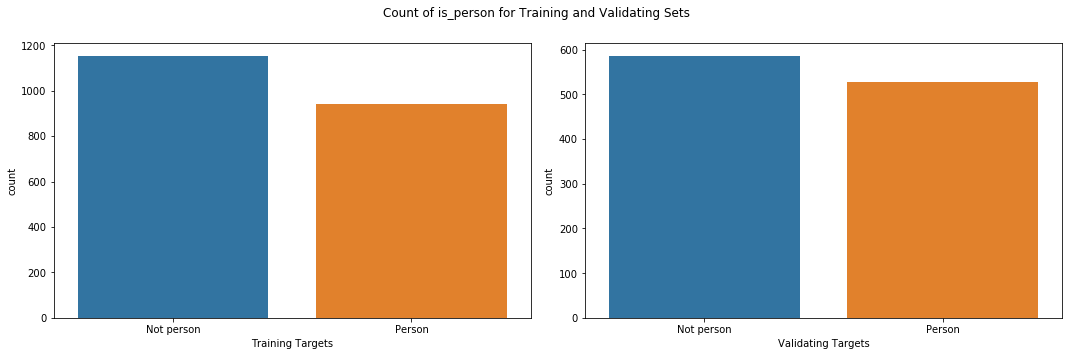

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='is_person',data=train_A,ax=ax1)
sns.countplot(x='is_person',data=valid_A,ax=ax2)
ax1.set_xticklabels(['Not person','Person'])
ax2.set_xticklabels(['Not person','Person'])
ax1.set_xlabel('Training Targets')
ax2.set_xlabel('Validating Targets')
plt.suptitle('Count of is_person for Training and Validating Sets')
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

### ========== Question 1.6 --- [1 mark] ==========
We want to make a baseline classification accuracy to beat. Pick a baseline "dummy" classifier, describe in a sentence why you chose it, and report the accuracy it achieves on the validation set?

I chose to return the most frequent class as output for my dummy classifier as simply guessing non-person will get an accuracy of 50%.

In [8]:
from sklearn.dummy import DummyClassifier
dc1 = DummyClassifier(strategy='most_frequent')
dc1.fit(X_tr,y_tr)
print('The dummy classifier has accuracy: {:.3f} on the validation set.'.format(dc1.score(X_val,y_val)))

The dummy classifier has accuracy: 0.527 on the validation set.


### ========== Question 1.7 --- [3 marks] ==========
Train a [`LogisticRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier using default settings, except for the `solver` parameter which you should set to `lbfgs`. Report the classification accuracy score on the training and validation sets and compare with the baseline. Comment on the results with 1-2 sentences. You may include any additional plot(s) if you wish to justify your explanation.

In [9]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr,y_tr)
print('Classification accuracy on training set:\t {:.3f}'.format(lr.score(X_tr, y_tr)))
print('Classification accuracy on validation set:\t {:.3f}'.format(lr.score(X_val, y_val)))

Classification accuracy on training set:	 0.551
Classification accuracy on validation set:	 0.527


The accuracy with Logistic Regressor on validation set has not improved at all in comparison to the baseline. 

### ========== Question 1.8 --- [1 mark] ==========
Display the means and standard deviations of the first 5 features in the training set. *Hint: you want to compute the means and standard deviations for each column in your arrays. Make sure you make appropriate use of the `axis` parameter.*

In [10]:
for column in X_tr.columns.tolist()[:5]: # Looping over columns
    mean = X_tr[column].mean()
    std = X_tr[column].std()
    print('Feature {} - \tMean: {:.6f}\tStandard Deviation: {:.6f}'.format(column,mean,std))

Feature dim1 - 	Mean: 0.001751	Standard Deviation: 0.001193
Feature dim2 - 	Mean: 0.000756	Standard Deviation: 0.001406
Feature dim3 - 	Mean: 0.004317	Standard Deviation: 0.003693
Feature dim4 - 	Mean: 0.001853	Standard Deviation: 0.001340
Feature dim5 - 	Mean: 0.002272	Standard Deviation: 0.001598


### ========== Question 1.9 --- [3 marks] ==========
Feature standardisation is a pre-processing technique used to transform data so that they have zero mean and unit standard deviation. For many algorithms, this is a very important step for training models (both regression and classification). Read about [feature standardisation](http://scikit-learn.org/0.17/modules/preprocessing.html) and make sure you understand what kind of transformation this method applies to the data.

`Scikit-learn` offers a [class](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) for feature standardisation. Instansiate a StandardScaler object and fit it using the **training features**. Use this fitted object to transform both your training and validation features to have a standard scale. 

Once your training and validation input data have been transformed, display the means and standard deviations of the first 5 attributes for **both** the training and validation sets. Are the results as you expected? Explain your answer in 2-3 sentences. Why didn't we use the validation set to standardise the data?

**IMPORTANT: You should use the transformed data for the rest of this part.**

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_tr)
X_tr_std = sc.transform(X_tr)
X_val_std = sc.transform(X_val)

print('Training Set')
mean = X_tr_std[:,0:5].mean(axis=0)
std = X_tr_std[:,0:5].std(axis=0)
for i in range(5):
    print('Mean: {:.6f}\tStandard Deviation: {:.6f}'.format(mean[i],std[i]))

print('\nValidation Set')
mean = X_val_std[:,0:5].mean(axis=0)
std = X_val_std[:,0:5].std(axis=0)
for i in range(5):
    print('Mean: {:.6f}\tStandard Deviation: {:.6f}'.format(mean[i],std[i]))



Training Set
Mean: -0.000000	Standard Deviation: 1.000000
Mean: -0.000000	Standard Deviation: 1.000000
Mean: 0.000000	Standard Deviation: 1.000000
Mean: 0.000000	Standard Deviation: 1.000000
Mean: -0.000000	Standard Deviation: 1.000000

Validation Set
Mean: -0.005506	Standard Deviation: 1.013109
Mean: -0.038293	Standard Deviation: 0.969819
Mean: 0.109151	Standard Deviation: 1.049228
Mean: 0.093693	Standard Deviation: 1.056845
Mean: 0.030578	Standard Deviation: 0.974713


The results are as expected. The mean of training data was transformed and then calcualted. The result is not exactly zero for mean of training data, but is almost zero (hence the minus sign). If the mean was printed with with default precision, one could see this easily. For example,

In [12]:
X_tr_std[:,0].mean() # mean of the first trainign feature of training data after standardisation.

-3.3948530136650752e-17

As expected the transformation of the validation set did not give perfect mean and standard deviation since it wasn't used to calculate mean and std.

Data Leakage - If we used the validation set to standardise the data, we would be introducing extra informationa about our test data in the model in form of test data's mean and std.

### ========== Question 1.10 --- [3 marks] ==========
By using the transformed input data, train a new `LogisticRegression` classifier. Again, set the `solver` parameter to `lbfgs` and use default settings for the other parameters. Report the classification accuracy on both the training and validation sets.

Comment on how your model compares to the baseline classifier from Question 1.6? You may use additional plot(s) to support your explanation.

In [262]:
lr2 = LogisticRegression(solver='lbfgs')
lr2.fit(X_tr_std,y_tr)
print('Classification accuracy on standardised training set:\t {:.3f}'.format(lr2.score(X_tr_std, y_tr)))
print('Classification accuracy on standardised validation set:\t {:.3f}'.format(lr2.score(X_val_std, y_val)))

Classification accuracy on standardised training set:	 0.811
Classification accuracy on standardised validation set:	 0.643


The performance on both train and test data has improved in comparison to our baseline predictor.

### ========== Question 1.11 --- [1 mark] ==========
So far we have used default settings for training the logistic regression classifier. Now, we want to use [K-fold cross-validation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to optimise the regularisation parameter `C`. The regularisation parameter controls the degree to which we wish to penalise large magnitudes in the weight vector. This can help us prevent overfitting but, if set too high, could lead us to underfit too.

Create a 3-fold cross-validation object. Set the `shuffle` parameter to `True` and the `random_state` to `0`. By using the cross-validation iterator, display the number of test samples for each fold.

In [14]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3,shuffle=True,random_state=0)
for _,test_index in kf.split(X_tr_std):
    print('Number of test samples for this fold is {}.'.format(test_index.size))

Number of test samples for this fold is 698.
Number of test samples for this fold is 698.
Number of test samples for this fold is 697.


### ========== Question 1.12 --- [2 marks] ========== 
Using the cross-validation iterator from the previous question, perform a search for the best value for `C`. 

We are going to loop over each CV fold, and each value of `C`. The values of `C` to search should be 20 equally-spaced values **in log space** ranging from `1e-5` to `1e5` *(hint: look at the `logspace()` function in numpy)*. 

Create a 2-dimensional array and, for each cross-validation fold and parameter setting pair, compute and store the classification accuracy score e.g. store the score of fold 0 with parameter setting 1 at score_array[0,1]. As previously, set the `solver` parameter to `lbfgs` and use default settings for the other parameters (except for `C` obviously!).

*(hint: you could use two loops in your code; one iterating over CV folds and another one iterating over the values for `C`)*. 

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
cs = np.logspace(-5,5,20)
arr = np.zeros((3,20))

for i,c in enumerate(cs):
    lgr = LogisticRegression(solver='lbfgs',C=c)
    score = cross_val_score(lgr,X_tr_std,y_tr,cv=kf)
    for fold in range(3):    # For each fold
        arr[fold,i] = score[fold]


### ========== Question 1.13 --- [1 mark] ========== 
Plot the mean classification performance (across CV folds) of the logistic regression classifier against the regularisation parameter `C` by using the range from Question 1.12. Use a logarithmic scale for the x-axis and label both axes appropriately. 

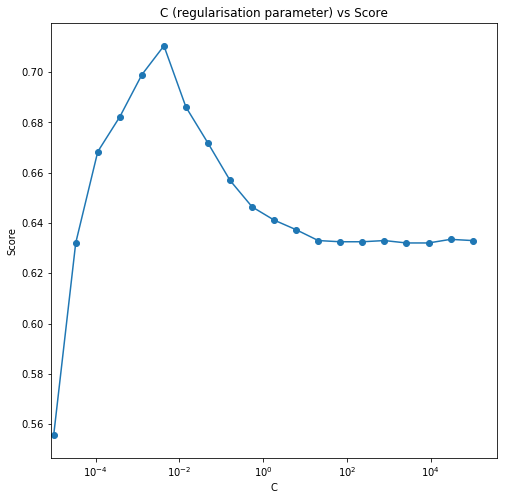

In [17]:
m = arr.mean(axis=0)
f = plt.figure(figsize=(8,8))
ax = plt.gca()
plt.xscale('log')
plt.plot(cs,m)
plt.scatter(cs,m)
plt.xlim(-5.5,)
plt.xlabel('C')
plt.ylabel('Score')
plt.title('C (regularisation parameter) vs Score')
plt.show()

### ========== Question 1.14 --- [2 marks] ==========
Display the optimal value for the regularisation parameter `C` determined by the search results from Question 1.12. Similarly to Question 1.13, consider the mean classifiation accuracy across CV folds. By using the optimal value (i.e. the one that yields the highest average classification accuracy) train a new `LogisticRegression` classifier and report the classification accuracy on the validation set. *(Hint: Do not pick the optimal value "by hand", instead use an appropriate numpy function).*

In [18]:
optimal_c = cs[m.argmax()]
print('The optimal value for C is {:.8f}.'.format(optimal_c))
lgr2 = LogisticRegression(solver='lbfgs',C=optimal_c)
lgr2.fit(X_tr_std,y_tr)
print('Classification accuracy on validation set with optimal c = {:.8f} is {:.3f}.'.
      format(optimal_c,lgr2.score(X_val_std,y_val)))


The optimal value for C is 0.00428133.
Classification accuracy on validation set with optimal c = 0.00428133 is 0.696.


### ========== Question 1.15 --- [1 mark] ========== 
Scikit-learn offers a [`LogisticRegressionCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) module which implements Logistic Regression with builtin cross-validation to find out the optimal `C` parameter. You can specify the range for the `C` parameter, as well as the cross-validation method you want to use with the `Cs` and `cv` parameters, respectively. Use the `C` range you set up in Question 1.12 and the 3-fold cross-validation iterator from Question 1.11. Once again, train the models by using the `lbfgs` optimisation method and display the optimal value for the parameter `C`. Finally, display the classification accuracy on the validation set. Check your results are consistent with those from Question 1.14!

In [19]:
from sklearn.linear_model import LogisticRegressionCV
lrcv = LogisticRegressionCV(solver='lbfgs',Cs = cs,cv=kf)
lrcv.fit(X_tr_std,y_tr)
print('The optimal value for C is {:.8f}.'.format(lrcv.C_[0]))
print('The classification accuracy is {:.3f}.'.format(lrcv.score(X_val_std,y_val)))

The optimal value for C is 0.00428133.
The classification accuracy is 0.696.


The results are consistent with Q1.14

### ========== Question 1.16 --- [1 mark] ==========
Now, we want to validate the importance of various features for classification. For this purpose, we will use a [`RandomForestClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (you might want to refer to the labs if you are unsure how we can estimate feature importances with decision tree and random forest models).

Initialise a random forest classifier and fit the model by using training data only and 500 trees (i.e. `n_estimators`). Set the `RandomState` equal to 42 to ensure reproducible results. Report the accuracy score on both the training and validation sets.

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500,random_state=42) # Leaving default criterion = gini 
rf.fit(X_tr_std,y_tr)
print('Training set\tAccuracy Score: {:.3f}'.format(rf.score(X_tr_std,y_tr)))
print('Validation set\tAccuracy Score: {:.3f}'.format(rf.score(X_val_std,y_val)))

Training set	Accuracy Score: 1.000
Validation set	Accuracy Score: 0.693


### ========== Question 1.17 --- [2 marks] ==========
Comment on the results above. Do you find the discrepancy between training and validation accuracies surprising?

I do not find the discrepancy surprising as one could expect perfect accuracy on the training set when using a decison tree based classifier. 

### ========== Question 1.18 --- [2 marks] ==========
By using the random forest model from the previous question order the features by descending importance and display the names of the 50 most important features.

In [21]:
args = rf.feature_importances_.argsort()[::-1][:50]
print('50 Most important features:\n')
for j,i in enumerate(X_tr.columns[args]):
    print('{}.\t{}'.format(j+1,i))

50 Most important features:

1.	dim21
2.	dim51
3.	dim360
4.	dim4
5.	dim479
6.	dim76
7.	dim283
8.	dim461
9.	dim343
10.	dim398
11.	dim348
12.	dim74
13.	dim485
14.	dim356
15.	dim330
16.	dim217
17.	dim263
18.	dim222
19.	dim134
20.	dim500
21.	dim274
22.	dim254
23.	dim206
24.	dim423
25.	dim347
26.	dim17
27.	dim326
28.	dim90
29.	dim92
30.	dim329
31.	dim214
32.	dim322
33.	dim289
34.	dim54
35.	dim440
36.	dim427
37.	dim73
38.	dim35
39.	dim77
40.	dim312
41.	dim315
42.	dim96
43.	dim288
44.	dim483
45.	dim299
46.	dim48
47.	dim442
48.	dim201
49.	dim344
50.	dim294


### ========== Question 1.19 --- [3 marks] ==========
Next, we would like to test the performance of support vector machines. Train three support vector classifiers with the following kernels: linear, radial basis function, and polynomial. Report the classification accuracy of each of the three classifiers on both the training and validation sets.

In [22]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_tr_std,y_tr)
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr_std, y_tr)
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_tr_std, y_tr)


print('SVC Linear Kernel\n')
print('Training set\tAccuracy Score: {:.3f}'.format(svc_linear.score(X_tr_std,y_tr)))
print('Validation set\tAccuracy Score: {:.3f}\n'.format(svc_linear.score(X_val_std,y_val)))

print('SVC rbf Kernel\n')
print('Training set\tAccuracy Score: {:.3f}'.format(svc_rbf.score(X_tr_std,y_tr)))
print('Validation set\tAccuracy Score: {:.3f}\n'.format(svc_rbf.score(X_val_std,y_val)))

print('SVC poly Kernel\n')
print('Training set\tAccuracy Score: {:.3f}'.format(svc_poly.score(X_tr_std,y_tr)))
print('Validation set\tAccuracy Score: {:.3f}\n'.format(svc_poly.score(X_val_std,y_val)))

SVC Linear Kernel

Training set	Accuracy Score: 0.842
Validation set	Accuracy Score: 0.639

SVC rbf Kernel

Training set	Accuracy Score: 0.911
Validation set	Accuracy Score: 0.730

SVC poly Kernel

Training set	Accuracy Score: 0.991
Validation set	Accuracy Score: 0.702



### ========== Question 1.20 --- [3 marks] ==========
At this point, we would like to get an idea of what kind of decision boundaries we can get with the three types of SVM kernels we introduced in the previous question. For visualisation, however, we can only make use of 2D input data. For this purpose, we select to use the 21st and 76th columns of our training features (*hint: remember that Python uses 0-based indexing*). 

Execute the cell below to define a useful function which we will be using to plot the decision boundaries *(it is also not a bad idea to try to understand what this functions does)*. 

Then train three distinct SVM classifiers by using the 2D input data mentioned above and default parameters:
* a linear SVC
* an RBF SVC 
* a polynomial SVC

Finally, create a list containing the three classifiers you have just trained. Use this list as an input to the provided function along with the used training features and observe the outcome. You can use the additional `title` parameter to set the titles in the subplots. Comment on the shape of the boundaries and what this means for classification accuracy in 1-2 sentences.

*(Acknowledgement: this Question has been heavily based on [this example](http://scikit-learn.org/0.17/auto_examples/svm/plot_iris.html) from scikit-learn's documentation.)*

In [23]:
def show_svc_decision_boundaries(clfs, X, title=None):
    """Plots decision boundaries for classifiers with 2D inputs.
    
    Parameters
    ----------
    clf : list
        Classifiers for which decision boundaries will be displayed.
    X : array
        Input features used to train the classifiers.
    title : list, optional
        Titles for classifiers.
    
    """
    
    assert X.shape[1] == 2 # Input should be 2D
    if title is not None:
        assert len(clfs) == len(title)
    
    h = .04 # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    plt.figure(figsize=(15,5))
    for i, clf in enumerate(clfs):
        plt.subplot(1, len(clfs), i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        # Training points
        plt.scatter(X[:, 0], X[:, 1], c=y_tr, cmap=plt.cm.Paired)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        if title is not None:
            plt.title(title[i])

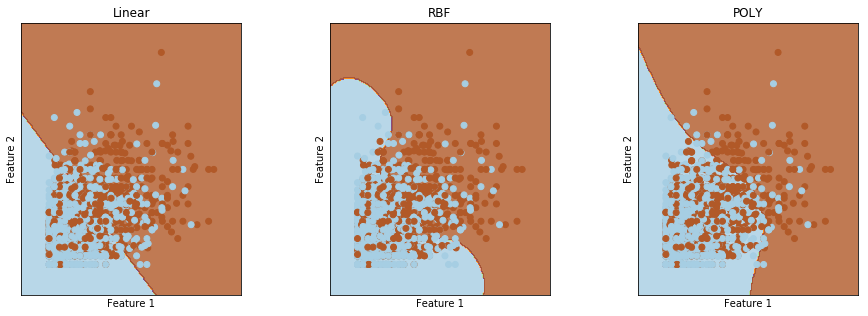

In [24]:
X = X_tr_std[:,[20,75]]

svc_linear1 = SVC(kernel='linear')
svc_linear1.fit(X,y_tr)

svc_rbf1 = SVC(kernel='rbf')
svc_rbf1.fit(X,y_tr)

svc_poly1 = SVC(kernel='poly')
svc_poly1.fit(X,y_tr)

clfs = [svc_linear1,svc_rbf1,svc_poly1]

show_svc_decision_boundaries(clfs, X,['Linear','RBF','POLY'])



The decision boundaries for the linear SVC is clearly linear. The decision boundary for RBF and POLY are expectedly non-linear. rbf and poly allow a more flexible decision boundary and hence a better fit in case data is not linearly seperable.



### ========== Question 1.21 --- [5 marks] ==========
So far we have used default parameters for training the SVM classifiers. Now we want to tune the parameters by using cross-validation. 

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of an SVM classifier with RBF kernel, while you vary the penalty parameter `C` in a logarithmic range `np.logspace(-2, 3, 10)`. Set the kernel coefficient parameter `gamma` to `auto` for this question. 

Plot the mean cross-validated classification accuracy against the regularisation parameter `C` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `C` which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

In [25]:
cs2 = np.logspace(-2,3,10)
arr2 = np.zeros((3,10))

for i,c in enumerate(cs2):
    svm = SVC(kernel='rbf', gamma='auto', C=c)
    score = cross_val_score(svm,X_tr_std,y_tr,cv=kf)
    for fold in range(3):    # For each fold
        arr2[fold,i] = score[fold]


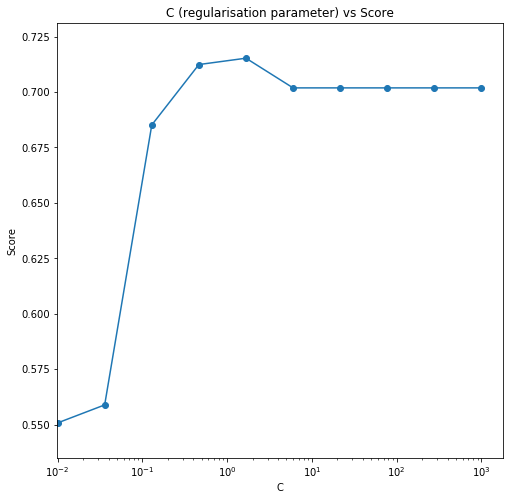

In [26]:
m2 = arr2.mean(axis=0)
f2 = plt.figure(figsize=(8,8))
ax = plt.gca()
plt.xscale('log')
plt.scatter(cs2,m2)
plt.plot(cs2,m2)
plt.xlim(-2.5,)
plt.xlabel('C')
plt.ylabel('Score')
plt.title('C (regularisation parameter) vs Score')
plt.show()

In [27]:
optimal_c2 = cs2[m2.argmax()]
print('Highest mean value score for C = {:.8f}  is {:.3f}.'.format(optimal_c2,m2.max()))
svm2 = SVC(kernel='rbf',C=optimal_c2)
svm2.fit(X_tr_std,y_tr)
print('Classification accuracy on training set with optimal C = {:.8f} is {:.3f}.'.
      format(optimal_c2,svm2.score(X_tr_std,y_tr)))
print('Classification accuracy on validation set with optimal C = {:.8f} is {:.3f}.'.
      format(optimal_c2,svm2.score(X_val_std,y_val)))

Highest mean value score for C = 1.66810054  is 0.715.
Classification accuracy on training set with optimal C = 1.66810054 is 0.975.
Classification accuracy on validation set with optimal C = 1.66810054 is 0.728.


### ========== Question 1.22 --- [5 marks] ==========
Now we turn to the kernel coefficient `gamma` parameter. By using the same procedure as in the previous question, estimate the classification accuracy of an SVM classifier with RBF kernel while you vary the `gamma` parameter in a logarithmic range `logspace(-5, 0, 10)`. Fix the penalty parameter `C=1.0`.

Plot the mean cross-validated classification accuracy against the parameter `gamma` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `gamma` which yielded it.  Label axes appropriately.

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

In [28]:
cs3 = np.logspace(-5,0,10)
arr3 = np.zeros((3,10))

for i,c in enumerate(cs3):
    svm = SVC(kernel='rbf', gamma=c, C=1.0)
    score = cross_val_score(svm,X_tr_std,y_tr,cv=kf)
    for fold in range(3):    # For each fold
        arr3[fold,i] = score[fold]


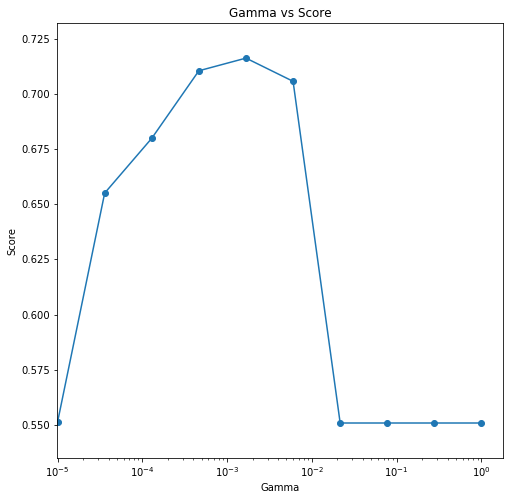

In [29]:
m3 = arr3.mean(axis=0)
f3 = plt.figure(figsize=(8,8))
ax = plt.gca()
plt.xscale('log')
plt.scatter(cs3,m3)
plt.plot(cs3,m3)
plt.xlim(-5.5,)
plt.xlabel('Gamma')
plt.ylabel('Score')
plt.title('Gamma vs Score')
plt.show()

In [30]:
optimal_c3 = cs3[m3.argmax()]
print('Highest mean value score for gamma = {:.8f}  is {:.3f}.'.format(optimal_c3,m3.max()))
svm3 = SVC(kernel='rbf',C=1.0,gamma=optimal_c3)
svm3.fit(X_tr_std,y_tr)
print('Classification accuracy on training set with optimal gamma = {:.8f} is {:.3f}.'.
      format(optimal_c3,svm3.score(X_tr_std,y_tr)))
print('Classification accuracy on validation set with optimal gamma = {:.8f} is {:.3f}.'.
      format(optimal_c3,svm3.score(X_val_std,y_val)))

Highest mean value score for gamma = 0.00166810  is 0.716.
Classification accuracy on training set with optimal gamma = 0.00166810 is 0.891.
Classification accuracy on validation set with optimal gamma = 0.00166810 is 0.727.


### ========== Question 1.23 --- [7 marks] ==========
Now we wish to tune both the `C` and `gamma` parameters simultaneously. To save computational time, we will now constrain the parameter search space. Define a `4 X 4` grid for the two parameters, as follows:
* `C`: `np.logspace(-2, 1, 4)`
* `gamma`: `np.logspace(-4, -1, 4)`

Estimate the mean cross-validated classification accuracy by using training data only and all possible configurations for the two parameters. 

Use a [heatmap](https://seaborn.github.io/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) to visualise the mean cross-validated classification accuracy for all `C`-`gamma` pairs. Label axes appropriately and display the values for `C` and `gamma` for the best performing configuration. 

Finally, by using the optimal configuration, train a classifier (without using cross-validation) and report the classification accuracy on the training and validation sets.

In [31]:
C = np.logspace(-2,1,4)
gamma = np.logspace(-4,-1,4)

arr4 = np.zeros((4,4))
for i,c in enumerate(C):
    for j,g in enumerate(gamma):
        svm4 = SVC(kernel='rbf',C=c,gamma=g)
        score = cross_val_score(svm4,X_tr_std,y_tr,cv=kf)
        arr4[i,j] = score.mean()

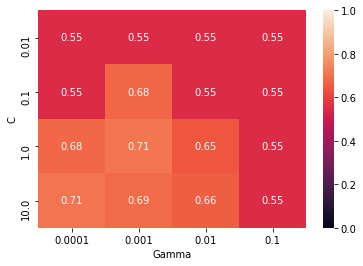

Best configuration: C = 1.0 gamma = 0.001
Classification accuracy on training set = 0.835.
Classification accuracy on validation set = 0.721.


In [32]:
sns.heatmap(data=arr4,xticklabels=gamma, yticklabels=C,vmin=0., vmax=1., annot=True)
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()
highest_index = np.unravel_index(arr4.argmax(),arr4.shape)
print('Best configuration: C = {} gamma = {}'.format(C[highest_index[0]],gamma[highest_index[1]]))

classifier = SVC(kernel='rbf',C=C[highest_index[0]],gamma=gamma[highest_index[1]])
classifier.fit(X_tr_std,y_tr)
print('Classification accuracy on training set = {:.3f}.'.
      format(classifier.score(X_tr_std,y_tr)))
print('Classification accuracy on validation set = {:.3f}.'.
      format(classifier.score(X_val_std,y_val)))

### ========== Question 1.24 --- [3 marks] ==========
Is the classification accuracy on the validation set higher than in previous questions (1.22-1.23)? If not, can you explain why? Can you think of a way of further improving the performance of the classifier? You don't need to implement your suggestion at this stage. Would there be any associated problems with your suggested approach? 

No, the classification accuaracy on validation set is not higher than in previous questions. The accuracy is comparable.

This is because gamma defines how far the influence of a single example reaches and C defines the complexity of decision surface. Both work in tandem with each other and can be adjusted to improve an overfitting or an underfitting model.  Note that when trying to find the best fit for gamma, C was set to 1.0 and the optimal we found was indeed 0.0016 which is very near 0.001 found above.

We can set our grid space to be wider to get a better configuration but it will cost us computation time.

### ========== Question 1.25 --- [5 marks] ==========
Now we want to evaluate the performance of an SVM classifier with polynomial kernel. Once again, we will tune the `degree` parameter by using cross-validation (similarly to what we did in Questions 1.21 and 1.22).

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of polynomial SVM classifier, while you vary the `degree` parameter in the range `np.arange(1,8)`. 

Plot the mean cross-validated classification accuracy against the polynomial degree. Display the highest obtained mean accuracy score and the value of the `degree` parameter which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

In [33]:
degrees = np.arange(1,8)
m4 = np.zeros(7)
for i,degree in enumerate(degrees):
    svmPoly = SVC(kernel='poly', degree=degree)
    score = cross_val_score(svmPoly,X_tr_std,y_tr,cv=kf)
    m4[i] = score.mean()

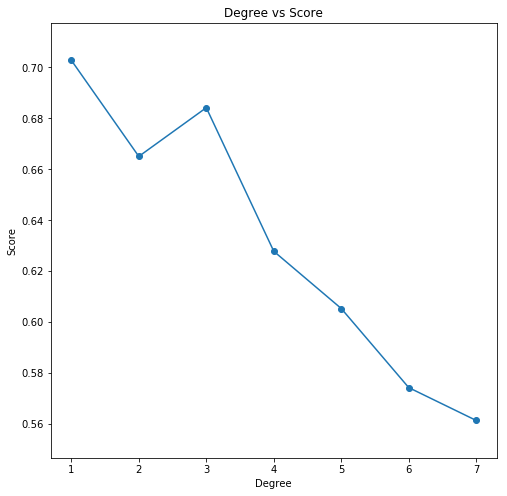

Highest mean value score for degree = 1  is 0.703.
Classification accuracy on training set with optimal degree = 1 is 0.784.
Classification accuracy on validation set with optimal degree = 1 is 0.689.


In [34]:
f4 = plt.figure(figsize=(8,8))
ax = plt.gca()
plt.scatter(degrees,m4)
plt.plot(degrees,m4)
plt.xlabel('Degree')
plt.ylabel('Score')
plt.title('Degree vs Score')
plt.show()

optimal_degree = degrees[m4.argmax()]
print('Highest mean value score for degree = {:.0f}  is {:.3f}.'.format(optimal_degree,m4.max()))
svm5 = SVC(kernel='poly', degree=optimal_degree)
svm5.fit(X_tr_std,y_tr)
print('Classification accuracy on training set with optimal degree = {:.0f} is {:.3f}.'.
      format(optimal_degree,svm5.score(X_tr_std,y_tr)))
print('Classification accuracy on validation set with optimal degree = {:.0f} is {:.3f}.'.
      format(optimal_degree,svm5.score(X_val_std,y_val)))

### ========== Question 1.26 --- [4 marks] ==========

You might have noticted that so far, we have used cross-validation for optimising the various tuning parameters (e.g. regularisation parameter in logistic regression, SVM kernel parameters) rather than hold-out validation, although we did have access to a validation set. Why do you think this is a good/bad idea? Give one advantage and one disadvantage of the two different approaches. Which one would you trust more in practice?

This is a good idea -  
1. By leaving out test data and doind CV on training data, we don't introduce any information about our test data in our model. Prevent data leakage.
2. K-fold is prone to less variation because it uses the entire training set

Hold-out

Advantage: lower computation cost. faster.

Disadvantage: not effective for small data size

K-fold

Advantage: prone to less variation , better for smaller data size

Disadvantage: high computation cost. slower

In practice, I would use a K-fold validation if it is practically feasible (size of data, time, proper splitting possible). With large amounts of data available however, hold out validation may be chosen. Sometimes, its just simpler to carry out hold-out validation (as it is used in literature often). 

### ========== Question 1.27 --- [6 marks] ==========

Reload the full training and validation data that contain all indicator variables for all object categories. Remove the `imgId` attribute but keep all of the class indicator variables in the dataset this time. Your training features should include all attributes except `is_person` which should be your target variable. 

Once again, use a [StandardScaler](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) to standardise your training and validation features. Then train a Random Forest Classifier by using the entropy `criterion`, 500 `n_estimators`, and also set the `random_state` to 31. Report the classification accuracy on the training and validation sets.

Similarly to what we did in Question 1.18, order the features by decreasing importance and display the 50 most important features. 

Finally, answer the following questions:
* What do you notice by looking at the list of the best 50 features?
* How does the performance differ with respect to the case when the additional class indicator variables are not present (Question 1.16)? Relate your observations to the observed feature ranking.
* Would it be easy to make use of the results in practice? Briey explain your reasoning.

*(Hint: you might want to look at some of the [images](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) to justify your explanations.)*

In [35]:
X_train = train_A.drop(['imgId','is_person'],axis=1)
y_train = train_A['is_person']

X_valid = valid_A.drop(['imgId','is_person'],axis=1)
y_valid = valid_A['is_person']

sc1 = StandardScaler()
sc1.fit(X_train)
X_train_std = sc1.transform(X_train)
X_valid_std = sc1.transform(X_valid)

rf1 = RandomForestClassifier(n_estimators=500,random_state=31,criterion='entropy')
rf1.fit(X_train_std,y_train)
print('Classification accuracy on training data: {}'.format(rf1.score(X_train_std,y_train)))
print('Classification accuracy on validation data: {}'.format(rf1.score(X_valid_std,y_valid)))

args1 = rf1.feature_importances_.argsort()[::-1][:50]
print('50 Most important features:\n')
for j,i in enumerate(X_train.columns[args1]):
    print('{}.\t{}'.format(j+1,i))

Classification accuracy on training data: 1.0
Classification accuracy on validation data: 0.711590296496
50 Most important features:

1.	is_cat
2.	is_bird
3.	dim21
4.	dim51
5.	dim360
6.	dim4
7.	dim76
8.	dim398
9.	dim283
10.	dim479
11.	dim263
12.	dim343
13.	dim423
14.	dim485
15.	dim254
16.	dim461
17.	dim222
18.	dim356
19.	dim74
20.	dim288
21.	dim214
22.	dim348
23.	dim330
24.	dim217
25.	dim483
26.	dim90
27.	dim274
28.	dim347
29.	dim17
30.	dim427
31.	dim35
32.	dim326
33.	dim73
34.	dim312
35.	dim48
36.	dim25
37.	dim315
38.	dim322
39.	dim329
40.	dim500
41.	dim134
42.	dim206
43.	is_aeroplane
44.	dim96
45.	dim353
46.	dim442
47.	dim77
48.	dim440
49.	dim171
50.	dim154


1. I notice that some is_class attributes have high importance, which means including is_class attributes in our training data should have an impact on our classifier.
2. The performance has improves a little. clearly, this must be because we included is_class attributes. In fact if we look at the images, we notice that if there is an aeroplane in the picture, chances of a person being there is little. And similarly for cat and bird.
3. It wouldn't be easy to use these results in practice as is_class attributes themselves are labels and we might have to do work to find their value in the first place.

## Mini challenge [30%]

*Important: You are allowed to write up to a maximum of 600 words in this part of the assignment. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final classification performance of your chosen method(s) and credit will be divided accordingly.*

In this final part of the assignment we will have a mini object-recognition challenge. Using the data provided you are asked to find the best classiffier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classifier you like (with the provison that you can explain what the classifier is/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation. 

**Important:** The classification performance metric that we will use for this part is the *cross-entropy* or *logarithmic loss* (see the labs). You should familiarise yourself with the metric by reading the `sklearn` [user guide](http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss) and [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss). To estimate this metric you will need to evaluate probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` classes, the method will return a `N` x `K` matrix.

We provide you with three new data sets: a training set (`train_images_partB.csv`), a validation set (`valid_images_partB.csv`), and a test set (`test_images_partB.csv`). You must use the former two for training and evaluating your models (as you see fit). Once you have chosen your favourite model (and pre-processing steps) you should apply it to the test set (for which no labels are provided). Estimate the posterior proabilities for the data points in the test set and submit your results as part of your answer. Your results will be evaluated in terms of the logarithmic loss metric. You also need to submit a brief description of the approaches you considered, your suggested final approach, and a short explanation of why you chose it. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final score of your chosen method(s) and credit will be divided accordingly.

*Hint: Feature engineering, feature combination, model combination and model parameter optimization can significantly improve performance.*

**How to submit your results**: Store the estimated probabilities for the data points in the test set in a 2D numpy array. Then execute the provided cell at the end of this notebook which uses a provided `save_predictions` function to export your results into a `.txt` file (the function will return an error if the provided array has not the right shape). The `.txt` file will be saved where your notebook lives. Submit this file along with your notebook as detailed at the top of this file.

*Your answer goes here (max. 600 words)*



# Discussion

I tried a lot of things to try and improve my performance. 

I originally didn't clean the data but just standardised it. I tried Random Forest (RF), Logistic Regressor (LR) and Support Vector Classifier (SVC) initially and then tried to optimise all my classifiers using GridSearchCV. 
Here is my initial plan:

Initial Plan  
1. Try RandomForestClassifier , Logistic Regression and SVC. 
2. Then find best configuration for each using grid search cv
3. Try to use voting classifier to see if performance can be improved 

Conclusion: Voting classifier had improved my results and I was getting almost 0.70 score and 0.59 log loss even when training with outliers!

However, in the second run of things, I noticed that there are outliers. Next steps I followed were:

1. Remove Outliers
2. Try all 3 classifiers with default setting
4. Optimise parameters for all classifiers with a grid search.
5. Use voting classifier combinations to improve the result further.

But, none of the above could get a better performance than SVC with default settings. Voting classifier didn't improve performance at all.

Next --

1. PCA tries to remove correlation. Grid Search for different component numbers with each classifier. While performance of some classifier, like Logistic Regressor improved, they still wern't outperforming my SVC.
2. Used correlation and feature importance from Random Forest to get a list of most important features. Tried using first 50, then first 100 and so on most important features from both lists. 

Still no improvement!

Finally, used the 500 attributes to predict is_cat, since the accuracy was high. I tried the following --- Use data to first predict is_cat and then use the positive probabilities to add another feature to the data, and then get the score again. Did this after researching that using features to create new features can improve the result. The results were good, but no significant improvement.

Still same scores! No improvement. 

Finally, I decided to use my best performing SVC which I had since the very beginning. 

Below, I've arranged my code in parts so that its easy to understand whats happening where.

## Cleaning and standardising the data

In [36]:
dataPath1 = os.path.join(os.getcwd(),'datasets','train_images_partB.csv')
dataPath2 = os.path.join(os.getcwd(),'datasets','valid_images_partB.csv')
dataPath3 = os.path.join(os.getcwd(),'datasets','test_images_partB.csv')
train_B = pd.read_csv(dataPath1)
valid_B = pd.read_csv(dataPath2)
test_B = pd.read_csv(dataPath3)

In [37]:
train_B.describe()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,is_cow,is_diningtable,is_dog,is_horse,is_motorbike,is_person,is_pottedplant,is_sheep,is_sofa,is_tvmonitor
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,0.043353,0.050830,0.047988,0.037411,0.043365,0.049670,0.051071,0.043601,0.052698,0.054139,...,0.017511,0.025083,0.088027,0.045433,0.048273,0.448178,0.040227,0.015144,0.032655,0.050639
std,0.513260,0.582839,0.482166,0.464611,0.491187,0.558422,0.577599,0.472706,0.571629,0.588484,...,0.131195,0.156414,0.283401,0.208301,0.214392,0.497425,0.196538,0.122156,0.177774,0.219311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000868,0.000000,0.001359,0.000781,0.001116,0.001019,0.000340,0.000651,0.000756,0.001116,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.001616,0.000340,0.003516,0.001698,0.002038,0.001860,0.000756,0.001645,0.001698,0.002155,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.002404,0.001008,0.006454,0.002717,0.003125,0.003057,0.001488,0.003397,0.002734,0.003736,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,9.984000,9.122238,7.676800,9.695738,8.762671,9.489078,9.751526,8.691076,9.013933,9.602705,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Notice, the max row above and contrast it with mean. Clearly, the data has outliers. Removing outliers now:

In [38]:
attributes = train_B.columns.tolist()[1:-19]
train_B_clean = train_B.copy()[attributes]

train_B_clean = train_B_clean[np.abs(train_B_clean-train_B_clean.mean())<=(3*train_B_clean.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

clean = train_B_clean.values # numpy array for easy iteration

# Remove NaN values
row_num_outlier = []
for row in range(2113):     
    for column in range(500):
        if np.isnan(clean[row, column]):  
            row_num_outlier.append(row)
            
row_num_outlier = list(set(row_num_outlier)) 
train_B_clean.drop(row_num_outlier, inplace = True, axis=0)

print('Shape of uncleaned set: {}'.format(train_B.shape))
print('Shape of cleaned set: {}'.format(train_B_clean.shape))
print('Rows removed: {}'.format(train_B.shape[0]-train_B_clean.shape[0]))

Shape of uncleaned set: (2113, 520)
Shape of cleaned set: (2093, 500)
Rows removed: 20


In [223]:
# Populating X and y for train  and validation set
# Removing image id and class attributes from X and setting y appropriately.

X_train = train_B_clean[attributes]
y_train = train_B.drop(row_num_outlier, inplace = False, axis=0)['is_person']
X_valid = valid_B[attributes]
y_valid = valid_B['is_person']

# Standardising data using StandardScaler
# as it was clear from previous questions that this
# will improve classification
stc = StandardScaler()
stc.fit(X_train)
X_train_std = stc.transform(X_train)
X_valid_std = stc.transform(X_valid)

In [224]:
# Similarly for test set
finalTest_X = test_B.drop('is_person',axis=1)
finalTest_X_std = stc.transform(finalTest_X)

## Original Testing with default values

In [220]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

In [222]:
dc = DummyClassifier(strategy='prior')
dc.fit(X_train_std,y_train)
ppd = dc.predict_proba(X_valid_std)
print('Base Line classifier: (score,log loss) {:.3f} , {:.5f}'.format(dc1.score(X_valid_std,y_valid),
                                                                          log_loss(y_valid,ppd)))

g1 = RandomForestClassifier(random_state=0,n_estimators=500)
g1.fit(X_train_std,y_train)
ppg = g1.predict_proba(X_valid_std)
print('Random forest classifier: (score,log loss) {:.3f} , {:.5f}'.format(g1.score(X_valid_std,y_valid),
                                                                          log_loss(y_valid,ppg)))

g2 = LogisticRegression(solver='lbfgs')
g2.fit(X_train_std,y_train)
ppg2 = g2.predict_proba(X_valid_std)
print('Logistic regression classifier: (score,log loss) {:.3f} , {:.5f}'.format(g2.score(X_valid_std,y_valid),
                                                                          log_loss(y_valid,ppg2)))

g3 = SVC(kernel='rbf', probability=True)
g3.fit(X_train_std,y_train)
ppg3 = g3.predict_proba(X_valid_std)
print('SVC classifier: (score,log loss) {:.3f} , {:.5f}'.format(g3.score(X_valid_std,y_valid),
                                                                          log_loss(y_valid,ppg3)))


Base Line classifier: (score,log loss) 0.527 , 0.69294
Random forest classifier: (score,log loss) 0.693 , 0.58566
Logistic regression classifier: (score,log loss) 0.643 , 0.83540
SVC classifier: (score,log loss) 0.730 , 0.54180


#### Initial values above will be used for comparison when trying to optimise parameters

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

## Grid Search to find best configurations

##### Optimising Random forest

In [253]:
clf = RandomForestClassifier(n_estimators=250,random_state=0)

param_grid = {"max_depth": [None, 5],
              "max_features": ['auto','log2'],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(clf, param_grid=param_grid,scoring='neg_log_loss') #   Use default 3 fold cross validation
grid_search.fit(X_train_std, y_train)
pass


In [254]:
df = pd.DataFrame.from_dict(grid_search.cv_results_) 
df[df['rank_test_score']<4]   # Show top 3 only

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_criterion,param_max_depth,param_max_features,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
8,3.733721,0.041843,-0.583277,-9.992007e-16,False,gini,None,auto,"{u'max_features': u'auto', u'bootstrap': False...",2,-0.578805,-9.992007e-16,-0.565715,-9.992007e-16,-0.605324,-9.992007e-16,0.032150,0.001362,0.016470,0.0
12,6.662349,0.039672,-0.583214,-9.992007e-16,False,entropy,None,auto,"{u'max_features': u'auto', u'bootstrap': False...",1,-0.578356,-9.992007e-16,-0.567278,-9.992007e-16,-0.604021,-9.992007e-16,0.069270,0.000515,0.015382,0.0
13,3.021123,0.041585,-0.588047,-9.992007e-16,False,entropy,None,log2,"{u'max_features': u'log2', u'bootstrap': False...",3,-0.585092,-9.992007e-16,-0.570327,-9.992007e-16,-0.608731,-9.992007e-16,0.038332,0.000227,0.015810,0.0


In [255]:
rf = RandomForestClassifier(random_state=0,n_estimators=500,bootstrap=False,criterion='entropy',max_depth=None,max_features='auto')
rf.fit(X_train_std, y_train)
pp = rf.predict_proba(X_valid_std)
print('Optimal random forest classifier has a log loss = {}.'.format(log_loss(y_valid,pp)))
print('Score with this classifier = {:.3f}.'.format(rf.score(X_valid_std,y_valid)))

Optimal random forest classifier has a log loss = 0.579032164225.
Score with this classifier = 0.702.


Previous results: score = 0.693 log loss = 0.585 . Optimal settings give a slightly better result. Both score and Log Loss have improved slightly.

##### Optimising Logistic Regressor

In [259]:
clf2 = LogisticRegression(solver='lbfgs',class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          random_state=0, tol=0.0001,
          verbose=0, warm_start=False)

param_grid2 = {'C': np.logspace(-6,8,20) }
              

grid_search2 = GridSearchCV(clf2, param_grid=param_grid2,scoring='neg_log_loss') # Use default 3 fold cross validation
grid_search2.fit(X_train_std, y_train)
pass

In [260]:
df2 = pd.DataFrame.from_dict(grid_search2.cv_results_) 
df2[df2['rank_test_score']<4]   # Show top 3 only

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
3,0.015022,0.001386,-0.618412,-0.600149,0.000162378,{u'C': 0.000162377673919},3,-0.616263,-0.601917,-0.605473,-0.609437,-0.633507,-0.589093,0.000414,0.000004,0.011540,0.008399
4,0.020322,0.001435,-0.589707,-0.537430,0.000885867,{u'C': 0.00088586679041},1,-0.590792,-0.536210,-0.561652,-0.552773,-0.616675,-0.523309,0.000702,0.000065,0.022466,0.012060
5,0.042376,0.001379,-0.592496,-0.453728,0.00483293,{u'C': 0.00483293023857},2,-0.603804,-0.450649,-0.540884,-0.474064,-0.632767,-0.436473,0.009764,0.000021,0.038339,0.015500


In [261]:
# using best found configuration
opt_c = df2[df2['rank_test_score'] == 1]['param_C'].real[0]
lr = LogisticRegression(solver='lbfgs',C=opt_c)
lr.fit(X_train_std, y_train)
pp2 = lr.predict_proba(X_valid_std)
print('Optimal Logistic regression classifier with C = {} has a log loss = {}.'.format(opt_c,log_loss(y_valid,pp2)))
print('Score with this classifier = {:.3f}.'.format(lr.score(X_valid_std,y_valid)))

Optimal Logistic regression classifier with C = 0.00088586679041 has a log loss = 0.583355583408.
Score with this classifier = 0.698.


Scores from before: score 0.643 log loss = 0.835 . Both log loss and score have improved. Significant improvement in log loss !

Now working on SVC. 

##### Optimising SVC

In [154]:
clf3 = SVC(kernel='rbf',probability=True)

param_grid3 = {"C": np.logspace(-2,2,10),
              "gamma": np.logspace(-4,0,10)}
# scoring is socre instead of neg_log_loss
grid_search3 = GridSearchCV(clf3, param_grid=param_grid3,scoring='neg_log_loss',n_jobs=8) #   Use default 3 fold cross validation
grid_search3.fit(X_train_std, y_train)
pass


In [155]:
df3 = pd.DataFrame.from_dict(grid_search3.cv_results_) 
df3[df3['rank_test_score']<4]   # Show top 3 only

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
43,19.011047,1.952302,-0.566344,-0.362705,0.599484,0.00215443,"{u'C': 0.599484250319, u'gamma': 0.00215443469...",1,-0.556953,-0.367328,-0.537086,-0.377762,-0.605020,-0.343025,0.684320,0.256530,0.028507,0.014553
52,17.744694,1.550511,-0.569592,-0.379667,1.6681,0.000774264,"{u'C': 1.6681005372, u'gamma': 0.000774263682681}",3,-0.568698,-0.382432,-0.531027,-0.402281,-0.609053,-0.354289,0.388135,0.021889,0.031845,0.019690
53,20.546477,1.768474,-0.566564,-0.194445,1.6681,0.00215443,"{u'C': 1.6681005372, u'gamma': 0.00215443469003}",2,-0.559954,-0.196644,-0.535738,-0.216141,-0.604020,-0.170549,0.193028,0.027839,0.028253,0.018678


In [156]:
opt_c2 = df3[df3['rank_test_score'] == 1]['param_C'].real[0]
opt_gamma = df3[df3['rank_test_score'] == 1]['param_gamma'].real[0]
svc = SVC(kernel='rbf',C=opt_c2,gamma=opt_gamma,probability=True)
svc.fit(X_train_std, y_train)
pp3 = svc.predict_proba(X_valid_std)
print('Optimal SVC with C = {}, gamma = {} has a log loss = {}.'.format(opt_c2,opt_gamma,
                                                                        log_loss(y_valid,pp3)))
print('Score with this classifier = {:.3f}.'.format(svc.score(X_valid_std,y_valid)))

Optimal SVC with C = 0.599484250319, gamma = 0.00215443469003 has a log loss = 0.545062409726.
Score with this classifier = 0.713.


No improvement.

##### Results from above

*Results till now from above*

    Optimal random forest classifier has a log loss = 0.579.
    Score with this classifier = 0.702.

    Optimal Logistic regression classifier with C = 0.00088586679041 has a log loss = 0.583.
    Score with this classifier = 0.698.

    Optimal SVC with C = 1.0, gamma = 0.001 has a log loss = 0.549.
    Score with this classifier = 0.721.



NEXT -- Try using these classifiers together to preict.


## Voting classifier

In [270]:
from sklearn.ensemble import VotingClassifier

#### SVC and Random forest (name: vc)

In [278]:
estimators1 = [('svc',SVC(kernel='rbf',C=opt_c2,gamma=opt_gamma,probability=True)),
               ('rf',RandomForestClassifier(random_state=0,n_estimators=500,bootstrap=False,criterion='entropy',
                                     max_depth=None,max_features='auto'))]

vc = VotingClassifier(estimators=estimators1,voting='soft',weights=[1,1])
vc.fit(X_train_std,y_train.as_matrix())
vcp = vc.predict_proba(X_valid_std)
print('Score: {}\tLog Loss: {}'.format(vc.score(X_valid_std,y_valid),log_loss(y_valid,vcp)))

Score: 0.714285714286	Log Loss: 0.555312728075


#### Using Logistic Regressor, Random forest and SVC (name: vc2)

In [273]:
estimators2 = [('lr',LogisticRegression(solver='lbfgs',C=opt_c,random_state=0)),
               ('rf',RandomForestClassifier(random_state=0,n_estimators=500,bootstrap=False,criterion='entropy',
                                     max_depth=None,max_features='auto')),
               ('svc',SVC(kernel='rbf',C=opt_c2,gamma=opt_gamma,probability=True))]

vc2 = VotingClassifier(estimators=estimators2,voting='hard',weights=[1,1,1])
vc2.fit(X_train_std,y_train.as_matrix())
vcp2 = vc2.predict_proba(X_valid_std)
print('Score: {}\tLog Loss: {}'.format(vc2.score(X_valid_std,y_valid),log_loss(y_valid,vcp2)))

Score: 0.714285714286	Log Loss: 0.562846135631


#### Using Logistic Regressor and SVC (name: vc3)

In [274]:
estimators3 = [('lr',LogisticRegression(solver='lbfgs',C=opt_c,random_state=0)),
               ('rf',RandomForestClassifier(random_state=0,n_estimators=500,bootstrap=False,criterion='entropy',
                                     max_depth=None,max_features='auto')),('svc2',SVC(kernel='rbf',C=opt_c3,gamma=opt_gamma2,probability=True))]

vc3 = VotingClassifier(estimators=estimators3,voting='hard',weights=[1,1,1])
vc3.fit(X_train_std,y_train.as_matrix())
vcp3 = vc3.predict_proba(X_valid_std)
print('Score: {}\tLog Loss: {}'.format(vc3.score(X_valid_std,y_valid),log_loss(y_valid,vcp3)))

Score: 0.715184186882	Log Loss: 0.562717298311


#### Logistic Regressor and random Forest (name: vc4)

In [276]:
estimators4 = [('lr',LogisticRegression(solver='lbfgs',C=opt_c,random_state=0)),
               ('rf',RandomForestClassifier(random_state=0,n_estimators=500,bootstrap=False,criterion='entropy',
                                     max_depth=None,max_features='auto'))]

vc4 = VotingClassifier(estimators=estimators4,voting='hard',weights=[1,1])
vc4.fit(X_train_std,y_train.as_matrix())
vcp4 = vc4.predict_proba(X_valid_std)
print('Score: {}\tLog Loss: {}'.format(vc4.score(X_valid_std,y_valid),log_loss(y_valid,vcp4)))

Score: 0.70530098832	Log Loss: 0.576995581624


Voting classifier didn't help at all. But it was worth trying!

## PCA

In [195]:
pca1,pca2,pca3= PCA(),PCA(),PCA()
lr = LogisticRegression()
rf = RandomForestClassifier()
svc = SVC(probability=True)

# Combining PCA and classifiers to a pipeline
pipe1 = Pipeline(steps=[('pca', pca1), ('lr', lr)])
pipe2 = Pipeline(steps=[('pca', pca2), ('rf', rf)])
pipe3 = Pipeline(steps=[('pca', pca3), ('svc', svc)])

n_components = [2,5,10,20,50,100,250,350,500]

params_grid1 = {
    'pca__n_components': n_components,
    "lr__C": np.logspace(-6,8,20)}

params_grid2 = {
    'pca__n_components': n_components,
    "rf__max_depth": [None, 5],
    "rf__max_features": ['auto','log2'],
    "rf__bootstrap": [True, False],
    "rf__criterion": ["gini", "entropy"]}

params_grid3 = {
    'pca__n_components': n_components, # optimal values from above: C = .599484250319, gamma = .00215443469003
    "svc__C": [0.599484250319],
    "svc__gamma": [0.00215443469003]}


estimator1 = GridSearchCV(pipe1, params_grid1,scoring='neg_log_loss',n_jobs=4)
estimator1.fit(X_train_std, y_train)

estimator2 = GridSearchCV(pipe2, params_grid2,scoring='neg_log_loss',n_jobs=4)
estimator2.fit(X_train_std, y_train)

estimator3 = GridSearchCV(pipe3, params_grid3,scoring='neg_log_loss',n_jobs=4)
estimator3.fit(X_train_std, y_train)

df1 = pd.DataFrame.from_dict(estimator1.cv_results_)   

df2 = pd.DataFrame.from_dict(estimator2.cv_results_)   

df3 = pd.DataFrame.from_dict(estimator3.cv_results_) 

print('Mean Log Loss LR : {:.3f}'.format(df1[df1['rank_test_score']==1]['mean_test_score'].values[0]))
print('Mean Log Loss RF : {:.3f}'.format(df2[df2['rank_test_score']==1]['mean_test_score'].values[0]))


Mean Log Loss LR : -0.590
Mean Log Loss RF : -0.613
Mean Log Loss SVC: -0.613


In [258]:
print('Mean Log Loss SVC: {:.3f}'.format(df3[df3['rank_test_score']==1]['mean_test_score'].values[0]))

Mean Log Loss SVC: -0.567


#### N.B. First score printed for SVC was an error. Running the whole script will take a lot of time!

Negative values because GridSearchCV tries to maximise the score. Before this, individual testing performed a better result when the C and gamma parameter were not fixed. Can't reproduce the code as rerun would take a lot of time but also because the performance wasn't much better than default.

## Feature importance using Correlation and Random Forest

#### Correlation

In [233]:
sorted_importance = np.array(train_B_clean.corr()['is_person'].drop('is_person')).argsort()[::-1]
# Feature importance based on correlation of columns with is_person column

In [197]:
scores = []
ll = []
# Checking for the most important ... i features 
for i in [250,275,300,325,350,400,425,450,475,500]:
    #Training and validation set only contain first i most important features
    TrainingX = X_train_std[:,sorted_importance[:i]] 
    ValidX = X_valid_std[:,sorted_importance[:i]]
    
    g3 = SVC(kernel='rbf', probability=True)
    g3.fit(TrainingX,y_train)
    
    ppg3 = g3.predict_proba(ValidX)
    scores.append(g3.score(ValidX,y_valid))
    ll.append(log_loss(y_valid,ppg3))

In [199]:
print('Best Performance: LL {:.3f} Score{:.3f}'.format(np.min(ll),np.max(scores)))

Best Performance: LL 0.542 Score0.730


Similar best performance. Not investigating further.

#### Random Forest

In [203]:
b = train_B_clean.columns[g1.feature_importances_.argsort()[::-1]]  

In [204]:
scores = []
ll = []
# Checking for the most important ... i features 
for i in [550,560,570,580,590,500]: # came to these values as log loss kept getting better in this direction 
    #Training and validation set only contain first i most important features
    TrainingX = X_train_std[:,sorted_importance[:i]]
    ValidX = X_valid_std[:,sorted_importance[:i]]
    
    g3 = SVC(kernel='rbf', probability=True)
    g3.fit(TrainingX,y_train)
    
    ppg3 = g3.predict_proba(ValidX)
    scores.append(g3.score(ValidX,y_valid))
    ll.append(log_loss(y_valid,ppg3))

In [205]:
print('Best Performance: LL {:.3f} Score {:.3f}'.format(np.min(ll),np.max(scores)))

Best Performance: LL 0.542 Score 0.730


Similar best performance. Not investigating further.

## Predict another is_class and then use that to predict is_person

In [211]:
train_B_clean2 = train_B_clean
train_B_clean2['is_cat'] = train_B['is_cat']  # adding is_cat so that classifier can learn with it

In [218]:
X_with_cat.shape,y_valid.shape

((2093, 501), (1113,))

In [227]:
svc_isCat = SVC(kernel='rbf',probability=True)
svc_isCat.fit(X_train_std,train_B_clean2['is_cat'])

prob = svc_isCat.predict_proba(X_valid_std)

# new X for Valid set will have the is_cat label predicted with its features before this
newXValid = X_valid_std
e1= [1 if p>0.5 else 0 for p in prob[:,0]]
newXValid = np.c_[newXValid,e1]   

# new X runs through a svc which is trained to predict with is_cat present
svc_isPerson = SVC(kernel='rbf',probability=True)
X_with_cat = np.c_[X_train_std,np.array(train_B_clean['is_cat'])]
svc_isPerson.fit(X_with_cat,y_train)
prob2 = svc_isPerson.predict_proba(newXValid)
print('Score: {}\tLog Loss: {}'.format(svc_isPerson.score(newXValid,y_valid),log_loss(y_valid,prob2)))

Score: 0.717879604672	Log Loss: 0.544090354221


Good performance. But similar to svc. I don't think carrying this forward will imprive performance much and perhaps this is the limit (or only until its not).

## Final - Saving output file

In [259]:
svc = SVC(kernel='rbf',probability=True)
svc.fit(X_train_std, y_train)
final_prob = svc.predict_proba(finalTest_X_std)

In [260]:
# Execute this cell to export your results
from numpy import savetxt
def save_predictions(pred_proba):
    if pred_proba.shape != (1114,2):
        raise ValueError('Predicted probabilities array is not the right shape.')
    
    savetxt('assignment_3_predictions.txt', pred_proba)

# You need to replace "test_images_partB_pred_proba"
# with the name of the array which contains the probability 
# estimates for the data in the test set.
save_predictions(final_prob) 

# Appendix

## More information about visual words

Visual words are based on [Scale-invariant feature transforms (SIFT)](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform). SIFT features are essentially local orientation histograms and capture the properties of small image regions. They possess attractive invariance properties which make them well suited for our task (you can read more about SIFT features in [D.Lowe, IJCV 60(2):91- 110, 2004](http://link.springer.com/article/10.1023/B:VISI.0000029664.99615.94), but the details don't matter for the purpose of this assignment). Each SIFT feature is a 128 dimensional vector. From each image many SIFT features are extracted, typically > 2500 per image (features are extracted at regular intervals using a 15 pixel grid and at 4 different scales). To obtain visual words a representative subset of all extracted SIFT features from all images is chosen and clustered with k-means using 500 centres (such use of the k-means algorithm will be discussed in detail during the lecture). These 500 cluster centres form our visual words. The representation of a single image is obtained by first assigning each SIFT feature extracted from the image to the appropriate cluster (i.e. we determine the visual word corresponding to each feature by picking the closest cluster centre). We then count the number of features from that image assigned to each cluster (i.e. we determine how often each visual word is present in the image). This results in a 500 dimensional count vector for each image (one dimension for each visual word). The normalized version of this count vector gives the final representation of the image (normalized means that we divide the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image)